In [1]:
from ggplot import *
import pandas as pd

In [116]:
with open('bach-chordsequence.txt', 'r') as f:
    BACH = [piece.strip('[]\n').split(', ') for piece in f.readlines()]
with open('beethoven-chordsequence.txt', 'r') as f:
    BEETHOVEN = [piece.strip('[]\n').split(', ') for piece in f.readlines()]
with open('debussy-chordsequence.txt', 'r') as f:
    DEBUSSY = [piece.strip('[]\n').split(', ') for piece in f.readlines()]
with open('scarlatti-chordsequence.txt', 'r') as f:
    SCARLATTI = [piece.strip('[]\n').split(', ') for piece in f.readlines()]
with open('victoria-chordsequence.txt', 'r') as f:
    VICTORIA = [piece.strip('[]\n').split(', ') for piece in f.readlines()]

In [119]:
labels = ['composer','length']
df = pd.DataFrame.from_records([('bach', len(piece)) for piece in BACH] +
                               [('beethoven', len(piece)) for piece in BEETHOVEN] +
                               [('debussy', len(piece)) for piece in DEBUSSY] +
                               [('scarlatti', len(piece)) for piece in SCARLATTI] +
                               [('victoria', len(piece)) for piece in VICTORIA], columns = labels)
df.describe(percentiles=[.1, .25, .5, .75, .90])

,length
count,4042.000000
mean,435.916378
std,590.176691
min,4.000000
10%,66.000000
25%,140.000000
50%,264.000000
75%,482.250000
90%,937.800000
max,8966.000000


In [3]:
from collections import Counter
flatten = lambda l: [item for sublist in l for item in sublist]

In [122]:
bach_chords = flatten(BACH)
beethoven_chords = flatten(BEETHOVEN)
debussy_chords = flatten(DEBUSSY)
scarlatti_chords = flatten(SCARLATTI)
victoria_chords = flatten(VICTORIA)

for cnt in [Counter(bach_chords),Counter(beethoven_chords),Counter(debussy_chords),Counter(scarlatti_chords),Counter(victoria_chords)]:
    print(pd.DataFrame.from_dict(cnt.most_common())[1].describe())

count      179.000000
mean      4282.296089
std       8649.457527
min          4.000000
25%        365.500000
50%       1400.000000
75%       4667.500000
max      83691.000000
Name: 1, dtype: float64
count      173.000000
mean      3653.150289
std       5626.847864
min         17.000000
25%        820.000000
50%       1837.000000
75%       4581.000000
max      52747.000000
Name: 1, dtype: float64
count     172.000000
mean      478.848837
std       532.832803
min         5.000000
25%       146.750000
50%       331.000000
75%       569.250000
max      3002.000000
Name: 1, dtype: float64
count     173.000000
mean      965.930636
std      1406.654668
min         1.000000
25%       165.000000
50%       446.000000
75%      1210.000000
max      9483.000000
Name: 1, dtype: float64
count     146.000000
mean      780.684932
std      1532.897818
min         1.000000
25%        19.750000
50%       191.500000
75%       814.000000
max      9265.000000
Name: 1, dtype: float64


In [135]:
with open('mxl-list.txt', 'r') as f:
    files = [line.replace('-', '_').split('_')[0].strip('()') for line in f.readlines()]

In [140]:
Counter(files).most_common()

[('bach', 2328),
 ('mozart', 767),
 ('haydn', 746),
 ('beethoven', 674),
 ('scarlatti', 598),
 ('handel', 536),
 ('polish', 394),
 ('hymns', 362),
 ('victoria', 333),
 ('schubert', 289),
 ('chopin', 277),
 ('tchaikovsky', 243),
 ('alkan', 238),
 ('dandrieu', 211),
 ('debussy', 199),
 ('pachelbel', 185),
 ('liszt', 174),
 ('brahms', 162),
 ('couperin', 159),
 ('canadian', 156),
 ('dvorak', 149),
 ('scottish', 140),
 ('irish', 140),
 ('lully', 119),
 ('schumann', 118),
 ('frescobaldi', 115),
 ('byrd', 113),
 ('saint', 105),
 ('cocquiel', 104),
 ('shostakovich', 104),
 ('faure', 100),
 ('english', 95),
 ('brade', 95),
 ('buxtehude', 94),
 ('schuetz', 92),
 ('morales', 89),
 ('scriabin', 87),
 ('guerrero', 87),
 ('lasso', 84),
 ('schein', 83),
 ('rosenmueller', 79),
 ('anonymous', 78),
 ('palestrina', 72),
 ('holborne', 69),
 ('mendelssohn', 68),
 ('anglebert', 67),
 ('franck', 65),
 ('soler', 65),
 ('raff', 63),
 ('albeniz', 63),
 ('cima', 62),
 ('markull', 62),
 ('froberger', 60),
 ('tel

In [54]:
# Below is just poking around the data

In [88]:
plot = ggplot(aes(x='length', color='composer'), data=df) + geom_density() + ylab('density')
plot.save('density.png', width=8, height=6, dpi=180)

In [87]:
plot = ggplot(aes(x='length', fill='composer', color='composer'), data=df) + geom_histogram(binwidth=100, alpha=0.5) + \
ylab('# pieces')
plot.save('histogram.png', width=6, height=6, dpi=180)

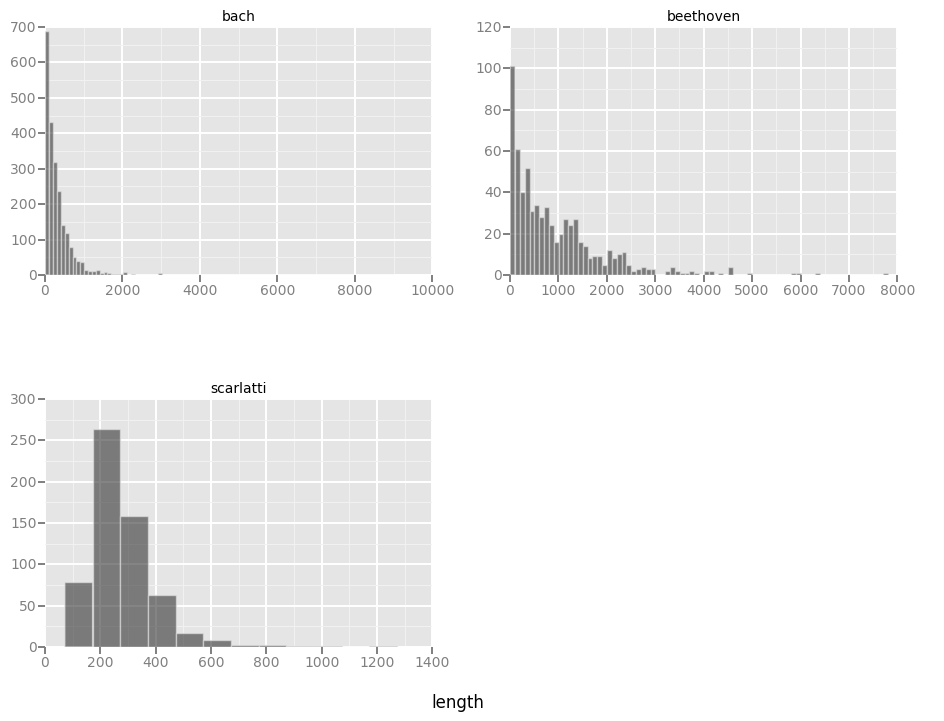

<ggplot: (-9223372036542203041)>

In [82]:
ggplot(df, aes(x='length')) + \
    geom_histogram(binwidth=100, alpha=0.6) + \
    facet_wrap("composer", scales="free")